<a href="https://colab.research.google.com/github/seenu-g/Experiments/blob/master/chap7/final/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# mount gdrive and unzip data
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
import sys
import os
folder = '/content/gdrive/My Drive/school_of_ai/chap7/'
os.chdir(folder)
print(os.getcwd()) 
for root, dirs, files in os.walk("."):
    for filename in files:
        print(filename)
sys.path.append(folder)

/content/gdrive/My Drive/school_of_ai/chap7
evaluate.py
model.py
load_data.py
train_test.py
show_images.py
Final.ipynb


In [0]:
%matplotlib inline
import torch
import load_data
import show_images
import model
import train_test
import evaluate

In [5]:
classes, trainloader, testloader = load_data.load()


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
CUDA Available? True


shape: torch.Size([128, 3, 32, 32])


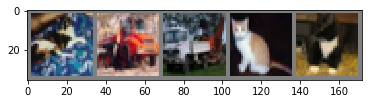

In [6]:
show_images.show_random_images(trainloader, classes)

In [24]:
import model
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
my_model = model.Net().to(device)
summary(my_model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 30, 30]             432
              ReLU-2           [-1, 16, 30, 30]               0
       BatchNorm2d-3           [-1, 16, 30, 30]              32
           Dropout-4           [-1, 16, 30, 30]               0
            Conv2d-5           [-1, 32, 30, 30]           4,608
              ReLU-6           [-1, 32, 30, 30]               0
       BatchNorm2d-7           [-1, 32, 30, 30]              64
           Dropout-8           [-1, 32, 30, 30]               0
            Conv2d-9           [-1, 64, 30, 30]          18,432
             ReLU-10           [-1, 64, 30, 30]               0
      BatchNorm2d-11           [-1, 64, 30, 30]             128
          Dropout-12           [-1, 64, 30, 30]               0
           Conv2d-13          [-1, 128, 30, 30]          73,728
             ReLU-14          [-1,

In [0]:
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(my_model.parameters(), lr=0.1, momentum=0.9)

In [28]:
EPOCHS = 4
for epoch in range(EPOCHS):
    print("EPOCH:", epoch+1)
    train_test.train(my_model, device, trainloader, optimizer, criterion, epoch)
    train_test.test(my_model, device, criterion, testloader)

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 1


Loss=1.783482551574707 Batch_id=390 Accuracy=34.85: 100%|██████████| 391/391 [00:28<00:00, 13.77it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0360, Accuracy: 2649/10000 (26.49%)

EPOCH: 2


Loss=1.4719123840332031 Batch_id=390 Accuracy=45.70: 100%|██████████| 391/391 [00:28<00:00, 14.55it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0153, Accuracy: 3043/10000 (30.43%)

EPOCH: 3


Loss=1.3435113430023193 Batch_id=390 Accuracy=52.85: 100%|██████████| 391/391 [00:28<00:00, 14.38it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0219, Accuracy: 4431/10000 (44.31%)

EPOCH: 4


Loss=1.2605702877044678 Batch_id=390 Accuracy=58.41: 100%|██████████| 391/391 [00:29<00:00, 14.38it/s]



Test set: Average loss: 0.0212, Accuracy: 3761/10000 (37.61%)



GroundTruth:    car   cat  frog   car   dog
Predicted:   frog  frog  frog   car   cat


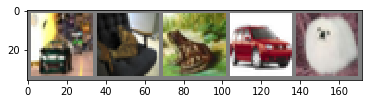

In [30]:
evaluate.show_predicted_actual(my_model, device, testloader, classes)

In [31]:
evaluate.evaluate_accuracy(my_model, device, testloader)

Accuracy of the network on the 10000 test images: 37 %


In [32]:
evaluate.evaluate_classwise_accuracy(my_model, device, classes, testloader)

Accuracy of plane :  9 %
Accuracy of   car : 35 %
Accuracy of  bird : 41 %
Accuracy of   cat : 13 %
Accuracy of  deer : 34 %
Accuracy of   dog :  0 %
Accuracy of  frog : 85 %
Accuracy of horse : 14 %
Accuracy of  ship : 73 %
Accuracy of truck : 57 %
